<a href="https://colab.research.google.com/github/Rishujamaiyar/Knowledge-Graphs/blob/main/Knowledge__graph_creation_and_visualization_using_Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Knowledge graph creation and visualization using Networkx

In [1]:
#Importing necessary libraries

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np

In [2]:
#Loading triples for graph generation

dp = pd.read_csv("/content/ckt_links.csv")
dp.columns=['Player', 'Role', 'Weight']
dp.head(5)

,Player,Role,Weight
0,Mayank Agarwal,Bat_IND,player
1,Rohit Sharma,Bat_IND,player
2,Shikhar Dhawan,Bat_IND,player
3,Virat Kohli,Bat_IND,player
4,Hardik Pandya,All_IND,player


In [3]:
#Generation of Knowledge Graph

GG = nx.Graph()
role = []
countries = []

for index, row in dp.iterrows():
  if (row[2]=='player') :
    if row[1] not in role:
      role.append(row[1])

  if (row[2]=='nationality'):
    if row[1] not in countries:
      countries.append(row[1])

  if (GG.has_node(row[0]) == 0):
    GG.add_node(row[0])

  if (GG.has_node(row[1]) == 0):
     GG.add_node(row[1])

  GG.add_edge(row[0], row[1])

In [4]:
print(role)
print(countries)

['Bat_IND', 'All_IND', 'Wc_IND', 'Bow_IND', 'Bat_AUS', 'All_AUS', 'Wc_AUS', 'Bow_AUS', 'Bat_ENG', 'All_ENG', 'Wc_ENG', 'Bow_ENG', 'Bat_NZ', 'All_NZ', 'Wc_NZ', 'Bow_NZ', 'Bat_Pak', 'All_Pak', 'Wc_Pak', 'Bow_Pak', 'Bat_SL', 'All_SL', 'Wc_SL', 'Bow_SL', 'Bat_SA', 'All_SA', 'Wc_SA', 'Bow_SA', 'Bat_BAN', 'All_BAN', 'Wc_BAN', 'Bow_BAN', 'Bat_WI', 'All_WI', 'Wc_WI', 'Bow_WI', 'Bat_AFG', 'All_AFG', 'Bow_AFG']
['IND', 'AUS', 'ENG', 'NZ', 'Pak', 'SL', 'SA', 'BAN', 'WI', 'AFG']


In [5]:
#Setting color schemes for nodes

for n in GG.nodes():
  if n == 'WC':
    GG.nodes[n]['color'] = 'red'
  elif n in countries:
    GG.nodes[n]['color'] = 'lightgreen'
  elif n in role:
    GG.nodes[n]['color'] = 'deepskyblue'
  else:
    GG.nodes[n]['color'] = 'lavender'    

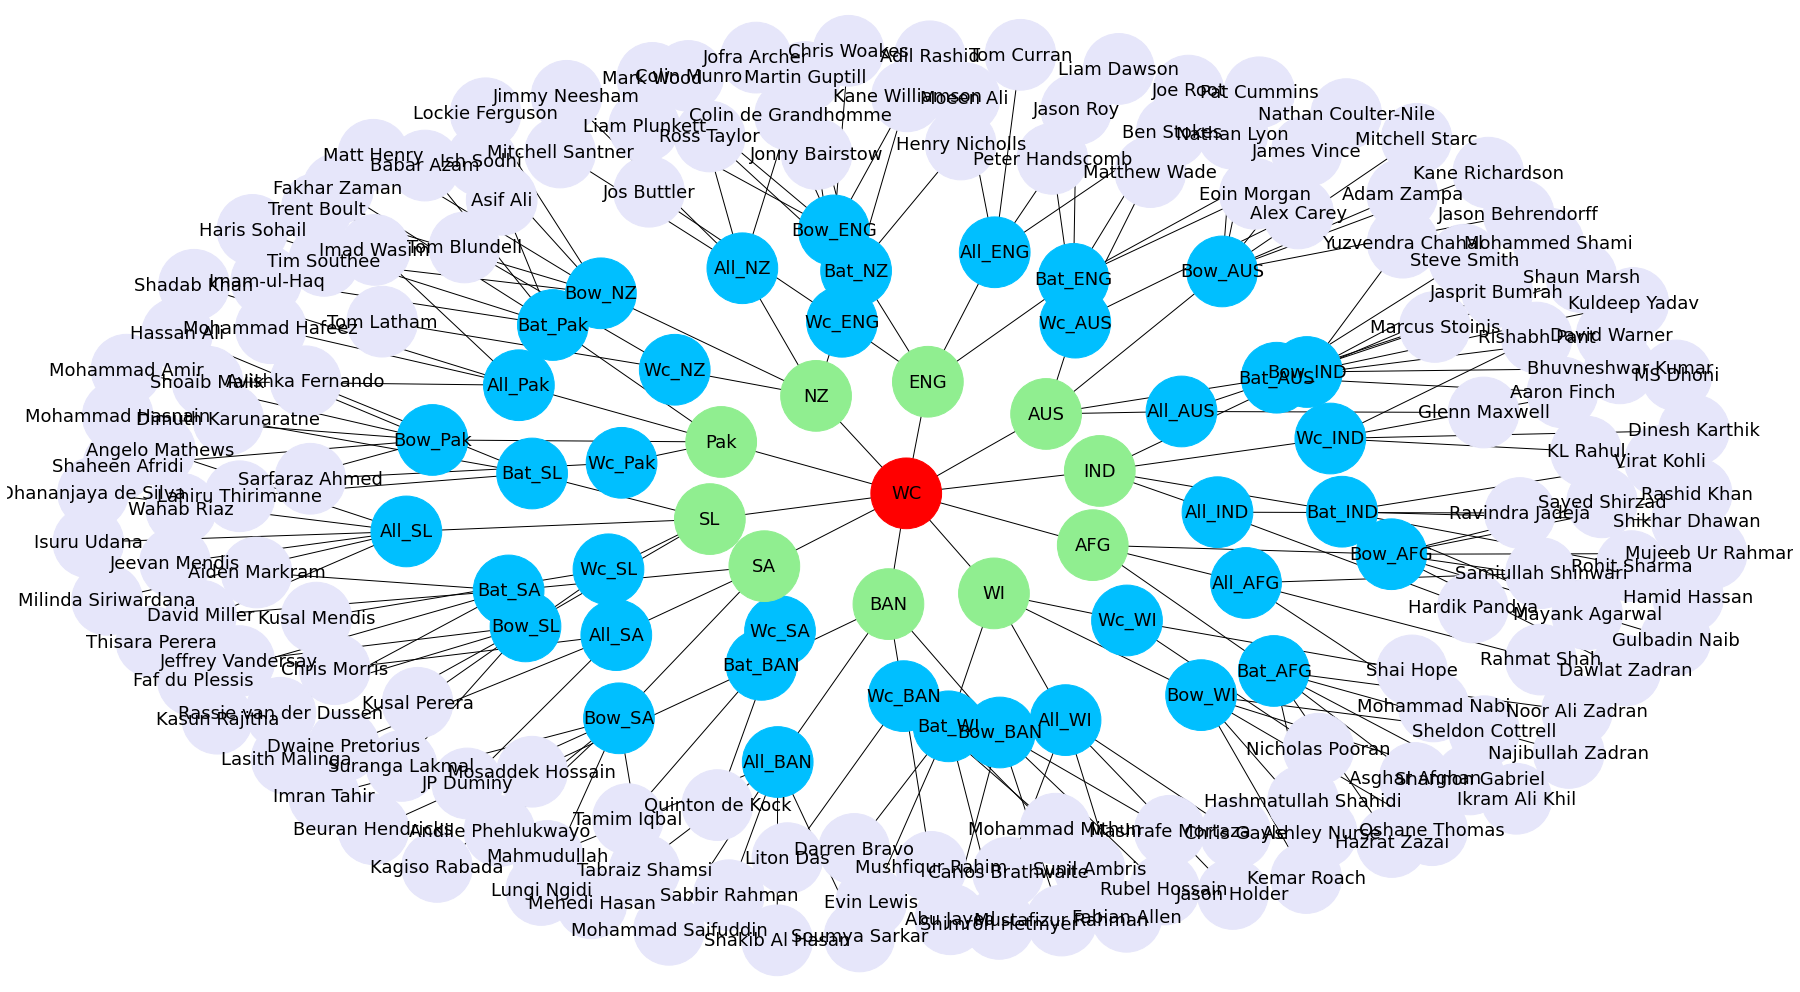

In [7]:
#Visualization of the Knowledge Graph
 
pos = nx.kamada_kawai_layout(GG)
colors = [node[1]['color'] for node in GG.nodes(data=True)]
nx.draw_networkx(GG, pos=pos, node_size=5000, node_color=colors, font_size=18)
plt.axis('off')
figure = plt.gcf()                      # get current figure
figure.set_size_inches(32, 18)          # set figure's size manually to your full screen (32x18)
plt.savefig('Graph_image_networkx.png', bbox_inches='tight') 
plt.show()